# AI_кабанчики, обучение DeiT


In [ ]:
%pip install datasets transformers -U

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for urllib3<1.27,>=1.21.1 from https://files.pythonhosted.org/packages/b0/53/aa91e163dcfd1e5b82d8a890ecf13314e3e149c05270cc644581f77f17fd/urllib3-1.26.18-py2.py3-none-any.whl.metadata
  Using cached urllib3-1.26.18-py2.py3-none-any.whl.metadata (48 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
Using cached urllib3-1.26.18-py2.py3-none-any.whl (143 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.20.24 requires botocore<1.24.0,>=1.23.24, but you have botocore 1.31.64 which is incompatible.
cloud-ml 0.0.1 requires s3fs<=0.5.2,>=0.4.1, but you have s3fs 2023.10.0 which is incompatible.
gcsfs 2023.6.0 requ

In [ ]:
%pip install gdown

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for urllib3<1.27,>=1.21.1 from https://files.pythonhosted.org/packages/b0/53/aa91e163dcfd1e5b82d8a890ecf13314e3e149c05270cc644581f77f17fd/urllib3-1.26.18-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 749.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 2.4 MB/s eta 0:00:00 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
import gdown

file_id = '1H5c0_lRH0NrNyXR_7IHAHPnHW708K6BY'
gdown.download(id=file_id, output='./')

Downloading...
From: https://drive.google.com/uc?id=1H5c0_lRH0NrNyXR_7IHAHPnHW708K6BY
To: /home/jupyter/work/resources/train_image_vit.rar
100%|██████████| 258M/258M [00:03<00:00, 65.6MB/s] 


'./train_image_vit.rar'

In [ ]:
%pip install patool
import patoolib
patoolib.extract_archive('train_image_vit.rar', outdir='./')

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for patool from https://files.pythonhosted.org/packages/ae/2d/7780e97ca4b9c6309f0df70a8c5ae93d894e8e233421e9268a17e11f19e6/patool-2.0.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 1.1 MB/s eta 0:00:00eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


INFO patool: Extracting train_image_vit.rar ...
INFO patool: running /usr/bin/7z x -o./ -- train_image_vit.rar
INFO patool:     with input=''
INFO patool: ... train_image_vit.rar extracted to `./'.


'./'

In [ ]:
from datasets import load_dataset

In [ ]:


ds = load_dataset(
    'imagefolder',
    data_dir='train_image_vit/train', # training dataset
    ignore_verifications=False,  # set to True if seeing splits Error

)

ds

/home/jupyter/.local/lib/python3.10/site-packages/datasets/load.py:2096: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=all_checks' instead.
  warnings.warn(


Resolving data files:   0%|          | 0/10252 [00:00<?, ?it/s]

Computing checksums:  57%|#####7    | 5874/10252 [00:05<00:03, 1174.75it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 10252
    })
})

In [ ]:
ds = ds['train'].train_test_split(test_size=0.2)

In [ ]:
dataset_train = ds['train']
dataset_test= ds['test']

In [ ]:
%pip install fsspec -U

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
num_classes = len(set(dataset_train['label']))
labels = dataset_train.features['label']
num_classes, labels

(4, ClassLabel(names=['Бетон', 'Грунт', 'Дерево', 'Кирпич'], id=None))

In [ ]:
dataset_train[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=365x132>,
 'label': 0}

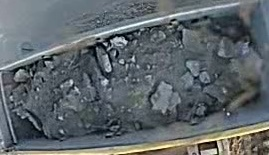

In [ ]:
dataset_train[0]['image']

In [ ]:
dataset_train[0]['label'], labels.names[dataset_train[0]['label']]

(0, 'Бетон')

In [ ]:
dataset_test

Dataset({
    features: ['image', 'label'],
    num_rows: 2050
})

### Loading ViT Feature Extractor

In [ ]:
from transformers import ViTFeatureExtractor

# import model
model_id = 'facebook/deit-base-patch16-384'
feature_extractor = ViTFeatureExtractor.from_pretrained(
    model_id
)

2023-11-25 03:19:38.573941: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/home/jupyter/.local/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  }
}

In [ ]:
example = feature_extractor(
    dataset_train[0]['image'],
    return_tensors='pt'
)
example

{'pixel_values': tensor([[[[-0.7490, -0.7490, -0.7412,  ..., -0.3176, -0.3255, -0.3255],
          [-0.7490, -0.7490, -0.7412,  ..., -0.3176, -0.3255, -0.3255],
          [-0.8118, -0.8118, -0.8039,  ..., -0.3176, -0.3255, -0.3255],
          ...,
          [-0.1529, -0.1529, -0.1529,  ..., -0.2157, -0.2157, -0.2157],
          [-0.1529, -0.1529, -0.1529,  ..., -0.2157, -0.2157, -0.2157],
          [-0.1529, -0.1529, -0.1529,  ..., -0.2157, -0.2157, -0.2157]],

         [[-0.7098, -0.7098, -0.7020,  ..., -0.0118, -0.0196, -0.0196],
          [-0.7098, -0.7098, -0.7020,  ..., -0.0118, -0.0196, -0.0196],
          [-0.7725, -0.7725, -0.7647,  ..., -0.0118, -0.0196, -0.0196],
          ...,
          [-0.1216, -0.1216, -0.1216,  ..., -0.2078, -0.2078, -0.2078],
          [-0.1216, -0.1216, -0.1216,  ..., -0.2078, -0.2078, -0.2078],
          [-0.1216, -0.1216, -0.1216,  ..., -0.2078, -0.2078, -0.2078]],

         [[-0.6863, -0.6863, -0.6784,  ...,  0.0431,  0.0353,  0.0353],
          [-0

In [ ]:
example['pixel_values'].shape

torch.Size([1, 3, 384, 384])

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
def preprocess(batch):
    inputs = feature_extractor(
        batch['image'],
        return_tensors='pt'
    )
    inputs['label'] = batch['label']
    return inputs

In [ ]:
prepared_train = dataset_train.with_transform(preprocess)
prepared_test = dataset_test.with_transform(preprocess)

Parameter 'transform'=<function preprocess at 0x7f8573993760> of the transform datasets.arrow_dataset.Dataset.set_format couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


In [ ]:
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [ ]:
import numpy as np
from datasets import load_metric

# accuracy metric
metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(
        predictions=np.argmax(p.predictions, axis=1),
        references=p.label_ids
    )

<ipython-input-21-11be3a050749>:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
%pip install accelerate -U

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for accelerate from https://files.pythonhosted.org/packages/13/9e/ee987874058f2d93006961f6ff49e0bcb60ab9c26709ebe06bfa8707a4d8/accelerate-0.24.1-py3-none-any.whl.metadata
  Obtaining dependency information for urllib3<1.27,>=1.21.1 from https://files.pythonhosted.org/packages/b0/53/aa91e163dcfd1e5b82d8a890ecf13314e3e149c05270cc644581f77f17fd/urllib3-1.26.18-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 808.7 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 9.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: 

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./shuffle_model",
  per_device_train_batch_size=48,
  evaluation_strategy="steps",
  num_train_epochs=10,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  load_best_model_at_end=True,
)

In [ ]:
from transformers import EarlyStoppingCallback, IntervalStrategy

In [ ]:
from transformers import ViTForImageClassification

labels = dataset_train.features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_id,  # classification head
    num_labels=len(labels),
    ignore_mismatched_sizes = True
)

config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/348M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at facebook/deit-base-patch16-384 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_train,
    eval_dataset=prepared_test,
    tokenizer=feature_extractor,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=7)]
)

In [ ]:
train_results = trainer.train()
# save tokenizer with the model
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
# save the trainer state
trainer.save_state()

Step,Training Loss,Validation Loss,Accuracy
100,0.148400,0.166520,0.941004
200,0.053000,0.107893,0.963920
300,0.084700,0.110252,0.962457
400,0.038800,0.072418,0.975622
500,0.065000,0.058506,0.981960
600,0.009400,0.095275,0.973184
700,0.001400,0.034221,0.989274
800,0.015700,0.079692,0.978059
900,0.000700,0.040046,0.988786
1000,0.000300,0.026234,0.991711


***** train metrics *****
  epoch                    =          10.0
  total_flos               = 17453101837GF
  train_loss               =        0.0474
  train_runtime            =    1:28:35.33
  train_samples_per_second =        15.429
  train_steps_per_second   =         0.322


In [ ]:
model.save_pretrained("/content/model")

#### Model Evaluation

We can now evaluate our model using the accuracy metric defined above...

In [ ]:
metrics = trainer.evaluate(prepared_test)
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =       10.0
  eval_accuracy           =     0.9917
  eval_loss               =     0.0207
  eval_runtime            = 0:00:55.33
  eval_samples_per_second =     37.064
  eval_steps_per_second   =      4.644


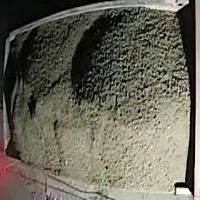

In [ ]:
image = dataset_test["image"][1325].resize((200,200))
image

In [ ]:
actual_label = dataset_test["label"][1325]

labels = dataset_test.features['label']
actual_label, labels.names[actual_label]


(1, 'Грунт')

In [ ]:
model.config

ViTConfig {
  "_name_or_path": "facebook/deit-base-patch16-384",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "problem_type": "single_label_classification",
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.35.2"
}

In [ ]:
dataset_test['label']

In [ ]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

# import our fine-tuned model
model_name_or_path = '/home/jupyter/datasphere/project/shuffle_model'
model_finetuned = ViTForImageClassification.from_pretrained(model_name_or_path)
# import features
feature_extractor_finetuned = ViTFeatureExtractor.from_pretrained(model_name_or_path)

/home/jupyter/.local/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
inputs = feature_extractor_finetuned(image, return_tensors="pt")

with torch.no_grad():
    logits = model_finetuned(**inputs).logits

In [ ]:
predicted_label = logits.argmax(-1).item()
labels = dataset_test.features['label']
labels.names[predicted_label]

'Грунт'

In [ ]:
labels.names

['Бетон', 'Грунт', 'Дерево', 'Кирпич']